# Lecture : Linear Discriminant Analysis (LDA)

Linear Discriminant analysis (LDA) is a classification algorithm that uses a Gaussian assumption and Bayes theorem to construct an optimal decision rule for separating the classes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import warnings
warnings.filterwarnings("ignore")

import IPython.display
%cd /content/drive/MyDrive/STAT335_Fall2024/classification

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/STAT335_Fall2024/classification'
c:\Users\Shouro Shuvit\OneDrive\Documents\GitHub\Fall2024\STAT 335\Notes


### Why do we need another method?

* When the classes are `well-separated`, the parameter estimates for the logistic regression model are `surprisingly unstable`. Linear discriminant analysis does not suffer from this problem.

* If `n is small` and the `distribution of the predictors X is approximately normal` in each of the classes, the linear discriminant model is again more stable than the logistic regression model.

* LDA (and its generalizations) are __optimal__ when the assumptions are met


## Bayes Theorem of Classification

### Recall

1. Probability density -- Let $X$ be a continuous random variable, then the __density__ at $X = x$ is denoted $f(x)$
 - The density is a continuous analogue of $P(X = x)$
 - The density is the likelihood $X$ takes values "close" to $x$

2. Bayes theorem -- For two events $A$ and $B$
$$p(A|B) = \frac{p(B|A)p(A)}{p(B)}$$

 if there are multiple events $A_1,...,A_K$ then
 $$p(A_k|B) = \frac{p(B|A_k)p(A_k)}{p(B)}$$
 where $$ p(B) = \sum_{k = 1}^K p(B|A_k)p(A_k)$$

### Setup

Suppose we are in the simplest case (p = 1) so there is a single feature $X$ to predict the class $Y$
- Data is the sequence of pairs $(x_1,y_1),...,(x_n,y_n)$
- $y_i$ can be any value in $1,...,k$.
- $x_i$ can be any real number

Let $f_k(x)$ denote the density of $X = x$ given $Y = k$
- I.e. given $y_i = k$, then $f_k(x_i)$ is the density of $x_i$
- If instead, $y_i = j$, then $f_j(x_i)$ is the density of $x_i$

$f_k(x)$ is relatively large if there is a high probability that an observation is in the $k$th class, and $f_k(x)$ is small if it is unlikely that an observation in the kth class.

In [3]:
IPython.display.Image('univariate_gaussian.png', width = 650, height = 350)

FileNotFoundError: No such file or directory: 'univariate_gaussian.png'

FileNotFoundError: No such file or directory: 'univariate_gaussian.png'

<IPython.core.display.Image object>

### Classification

$f_k(x)$ is __not__ what we want
- $f_k(x)$ is the density of $X = x$ given the class $Y = k$
- We want the probability $Y = k$ given the observation $X = x$, i.e. $p(Y = k|X = x)$

We can use Bayes theorem to invert $f_k(x)$ into $p(Y = k|X = x)$

$$p(Y = k|X = x) = \frac{f_k(x)\pi_k}{\sum_{l = 1}^K f_l(x) \pi_l}$$

where $\pi_k$ is the prior probablity that an observation comes from the $k^{th}$ class
- Typically assumed to be $1/K$ (uniform)
- or equal to inverse class frequencies

and $\sum_{l = 1}^K f_l(x) \pi_l = f(x)$ is the marginal density of $X = x$ over all classes.

The __Bayes classifier__ is defined as
$$C(X = x) = \arg\max_{k \in 1,...,K} p(Y = k|X = x)$$

The Bayes classifer is the optimal classification algorithm (in theory)
- If you truly knew the class densities $f_k(x)$ then the Bayes classifier has the lowest possible error rate
- Even fancy ML algorithms try to show they are close to the Bayes error rate
- The problem is that we dont know $f_k(x)$

## 1.2  Linear Discriminant Analysis (LDA)

LDA is the Bayes classifier assuming...
- The predictors are Normally distributed.
- And $\sigma_1 = \sigma_2 = \ldots = \sigma_K$ for $K$ classes.
  * $f_1(x) = $ Normal($\mu_1$, $\sigma$) for class 1
  * $f_2(x) = $ Normal($\mu_2$, $\sigma$) for class 2
  * etc.

Assign each observation to whichever class has the highest posterior probability.
- I.e. we assume $f_k(x)$ is Normal and construct the Bayes classifier

### Example with two classes

Suppose we have two classes $Y = 0$ and $Y = 1$ and a single predictor $X$

First we assume:   
- $f_0(x) = $ Normal($\mu_0$, $\sigma$) for class 0
- $f_1(x) = $ Normal($\mu_1$, $\sigma$) for class 1
- $\pi_1(x) = \pi$ and $\pi_0(x) = 1 - \pi$

Then we estimate
- $\hat \mu_0$ is the mean of all $X$ values where $Y = 0$
- $\hat \mu_1$ is the mean of all $X$ values where $Y = 1$
- $\hat \sigma$ is the standard deviation of $X$
- $\hat \pi$ is the fraction of observations where $Y = 1$

Denote
- $\hat{f_0}(x) = $ Normal($\hat \mu_0$, $\hat \sigma$) for class 0
- $\hat{f_1}(x) = $ Normal($\hat \mu_1$, $\hat \sigma$) for class 1

Compute the posterior probabilities

$$p(Y = 0|X = x) = \frac{\hat{f_0}(x) (1 - \hat \pi)}{\hat{f_0}(x) \hat \pi + \hat{f_1}(x) (1 - \hat \pi)}$$

$$p(Y = 1|X = x) = \frac{\hat{f_1}(x) \hat \pi}{\hat{f_0}(x) \hat \pi + \hat{f_1}(x) (1 - \hat \pi)}$$

### Extension to multiple classes

The extension to multiple classes is super easy

1. Estimate means $\hat \mu_1,.., \hat \mu_K$ for the $K$ classes, estimate $\hat \sigma$, and prior probabilities $\pi_1,...,\pi_K$

2. Using the normal assumption we can exactly compute


$$p(Y = 1|X = x) = \frac{\hat{f_1}(x) \hat \pi_1}{\sum_{i = 1}^K \hat{f_i}(x) \hat \pi_i}$$

$$\vdots$$

$$p(Y = K|X = x) = \frac{\hat{f_K}(x) \hat \pi_K}{\sum_{i = 1}^K \hat{f_i}(x) \hat \pi_i}$$

### 1.3. Decision Boundary for LDA

We can derive an explicit decision boundary for LDA from the above equations

We assign an observation $X$ to class $k \in \{1,...,K\}$ if

$$\log P(Y = k \mid X = x) = -\frac{1}{2\sigma}(x - \mu_k)^2 + \log \pi_k + C$$

<!-- $$ X.\frac{\mu_A}{\sigma^2} - \frac{\mu^2_A}{2\sigma^2} + \log(\pi_A)  $$ -->

is highest across all classes $k \in \{1,...,K\}$ for some constant $C$. $C$ doesn't matter since it doesn't vary across choice of $k$.

Derivation not shown but...
1. Plug in normal density
2. Take log
3. Remove terms that don't vary with $k$

The above equation can be further reduced into a __linear__ function of $x$
$$ x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log \pi_k + C $$

hence the name __linear disciminant analysis__.



# Example 1


Classify if a woman has breast cancer or not (binary classification) based on a set of attributes of cell nuclei in an image scan

In [4]:
from sklearn import datasets
cancer = datasets.load_breast_cancer(as_frame=True)
x, y = cancer.data, cancer.target

x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


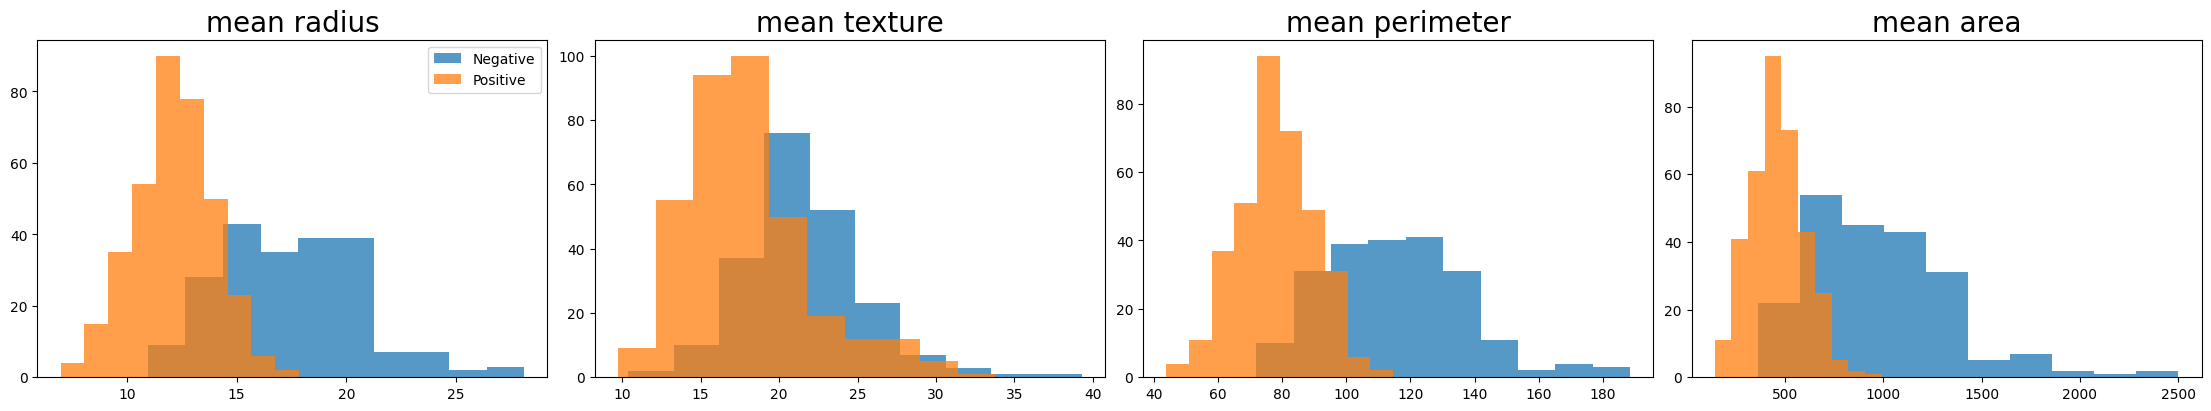

In [5]:
fig, ax = plt.subplots(1, 4, constrained_layout = True, figsize = (22, 4))
ax[0].hist(x.loc[y == 0, 'mean radius'], color = 'C0', alpha = 0.75, label = 'Negative')
ax[0].hist(x.loc[y == 1, 'mean radius'], color = 'C1', alpha = 0.75, label = 'Positive')
ax[0].set_title('mean radius', fontsize = 20)
ax[0].legend()

ax[1].hist(x.loc[y == 0, 'mean texture'], color = 'C0', alpha = 0.75)
ax[1].hist(x.loc[y == 1, 'mean texture'], color = 'C1', alpha = 0.75)
ax[1].set_title('mean texture', fontsize = 20)

ax[2].hist(x.loc[y == 0, 'mean perimeter'], color = 'C0', alpha = 0.75)
ax[2].hist(x.loc[y == 1, 'mean perimeter'], color = 'C1', alpha = 0.75)
ax[2].set_title('mean perimeter', fontsize = 20)

ax[3].hist(x.loc[y == 0, 'mean area'], color = 'C0', alpha = 0.75)
ax[3].hist(x.loc[y == 1, 'mean area'], color = 'C1', alpha = 0.75)
ax[3].set_title('mean area', fontsize = 20)
plt.show()

Lets use a single variable `mean radius` to predict breast cancer status

In [6]:
# assume its normal anyways
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x = x[['mean radius']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lda = LDA()
lda.fit(x_train, y_train)
yhat_train = lda.predict(x_train)
yhat_test = lda.predict(x_test)

In [7]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(sensitivity, specificity, f1)

1.0 0.7014925373134329 0.9236641221374046


## 2. Classes with Multiple Gaussian Predictors

Now suppose we have $p$ predictors $X_1,...,X_p$

We extend LDA to the multivariate setting by assuming $X_1,...,X_p$ follows a multivariate Gaussian distribution

$$X = (X_1, X_2,...,X_p) \sim \text{Normal}(\mu, \Sigma)$$

- $E(X) = \mu = (\mu_1, \mu_2, ..., \mu_p)$ is the mean of $X$ (a vector with $p$ components)

- Cov($X$) = $\Sigma$ is the $p \times p$ `covariance matrix` of X .

The multivariate Gaussian density is defined as

$$f(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}\exp{\Big(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu) \Big)} $$

Where
$$\mu = (\mu_1, \mu_2, \dots, \mu_p)$$

and $$ \Sigma =  \begin{bmatrix}
Var(X_1) & Cov(X_1, X_2) & \ldots & Cov(X_1, X_p) \\
Cov(X_2, X_1) & Var(X_2) & \ldots & Cov(X_2, X_p) \\
\vdots \\
Cov(X_p, X_1) & Cov(X_p, X_2)  & \ldots & Var(X_p)
\end{bmatrix}$$


When predictors are uncorrelated :  $Cov(X_1, X_2) = 0$

$$\Sigma =  \begin{bmatrix}
V(X_1) & 0 \\
0 & V(X_2)
\end{bmatrix}$$

is a diagonal matrix ($p = 2$) and the surface is bell shaped or __circular__

When the predictors are correlated (non diagonal) then the surface will be __elliptical__


In [8]:
IPython.display.Image('mult_LDA.png', width = 650, height = 450)

FileNotFoundError: No such file or directory: 'mult_LDA.png'

FileNotFoundError: No such file or directory: 'mult_LDA.png'

<IPython.core.display.Image object>

### Example with two classes

Suppose we have two classes $Y = 0$ and $Y = 1$ and $p$ predictors $X_1,...,X_p$

First we assume:   
- $f_0(x) = $ Normal($\mu_0$, $\Sigma$) for class 0
- $f_1(x) = $ Normal($\mu_1$, $\Sigma$) for class 1
- $\pi_1(x) = \pi$ and $\pi_0(x) = 1 - \pi$

Then we estimate
- $\hat \mu_0 = (E(X_1), E(X_2), ... ,E(X_p))$ is the mean of all $X_1,...,X_p$values where $Y = 0$
- $\hat \mu_1 = (E(X_1), E(X_2), ... ,E(X_p))$ is the mean of all $X_1,...,X_p$values where $Y = 1$
- $\hat \Sigma$ is the covariance matrix of $X_1,...,X_p$
- $\hat \pi$ is the fraction of observations where $Y = 1$

Denote
- $\hat{f_0}(x) = $ Normal($\hat \mu_0$, $\hat \Sigma$) for class 0
- $\hat{f_1}(x) = $ Normal($\hat \mu_1$, $\hat \Sigma$) for class 1

Compute the posterior probabilities

$$p(Y = 0|X = x) = \frac{\hat{f_0}(x) (1 - \hat \pi)}{\hat{f_0}(x) \hat \pi + \hat{f_1}(x) (1 - \hat \pi)}$$

$$p(Y = 1|X = x) = \frac{\hat{f_1}(x) \hat \pi}{\hat{f_0}(x) \hat \pi + \hat{f_1}(x) (1 - \hat \pi)}$$

#### What happens when an new observation $x_*$ falls on the boundary : ??

$$x_*^T\hat\Sigma^{-1}\hat\mu_1 -  \frac{1}{2}\hat\mu_1^T\hat\Sigma^{-1}\hat\mu_1 + \log(\hat\pi_1) = x_*^T\hat\Sigma^{-1}\hat\mu_2 -  \frac{1}{2}\hat\mu_2^T\hat\Sigma^{-1}\hat\mu_2 + \log(\hat\pi_2) $$

Who cares -- the probability of this happening is 0

# Example 2

Lets revisit image recognition with our fancy new classification algorithm

feature values are pixel intensities and are not even close to normal


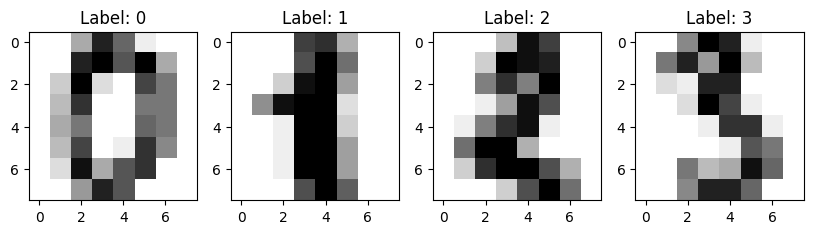

In [9]:
from sklearn import datasets
digits = datasets.load_digits()
x, y = digits.data, digits.target

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

Feature values are not even close to normal

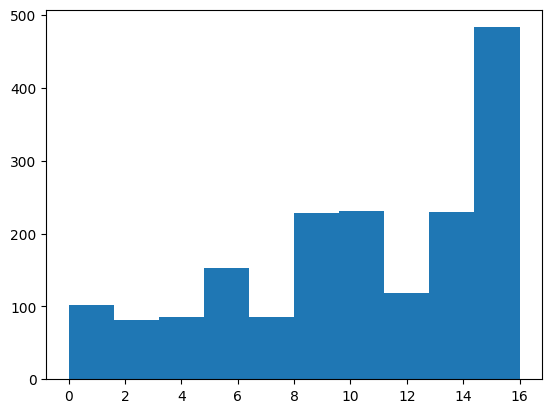

In [10]:
plt.hist(x[:,12])
plt.show()

just try it

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lda = LDA()
lda.fit(x_train, y_train)
yhat_train = lda.predict(x_train)
yhat_test = lda.predict(x_test)

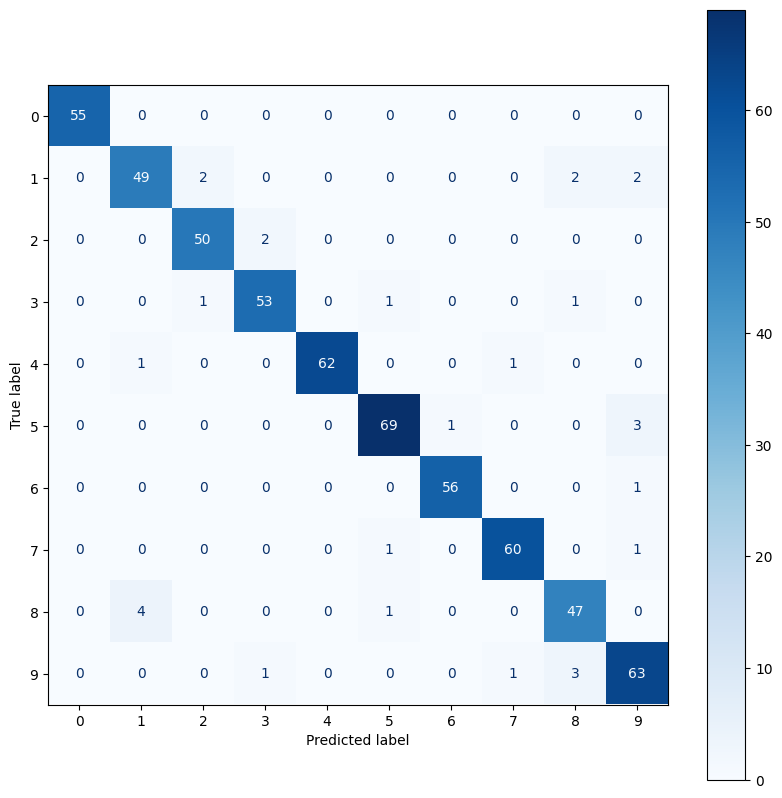

In [12]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix_display.plot(ax = ax, cmap = 'Blues')

In [13]:
class_report = metrics.classification_report(y_test, yhat_test)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.91      0.89      0.90        55
           2       0.94      0.96      0.95        52
           3       0.95      0.95      0.95        56
           4       1.00      0.97      0.98        64
           5       0.96      0.95      0.95        73
           6       0.98      0.98      0.98        57
           7       0.97      0.97      0.97        62
           8       0.89      0.90      0.90        52
           9       0.90      0.93      0.91        68

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



Just because we made assumptions to derive a method, doesnt mean our data needs to meet those assumptions to classify well.

LDA is fairly robust to violations of the normality assumption.

# 3. Quadratic Discriminant Analysis

- Assumes that the predictors are Normally distributed.
- Assumes that  $\sigma_1 \neq \sigma_2 \neq  \ldots \neq  \sigma_K$ for $K$ classes.
  * Normal($\mu_1$, $\sigma_1$) for class 1
  * Normal($\mu_2$, $\sigma_2$) for class 2
  * etc.
- Using Bayes rule for classification we assign each observations to whichever class has the highest posterior probability

The same as LDA except that variances are different for each class

https://scikit-learn.org/stable/modules/lda_qda.html

QDA is more flexible than LDA, but that doesn't mean it will necessarily perform better.

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# breast cancer classification
cancer = datasets.load_breast_cancer(as_frame=True)
x, y = cancer.data, cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=420)

lda = LDA()
lda.fit(x_train, y_train)
yhat_lda = lda.predict(x_test)

qda = QDA()
qda.fit(x_train, y_train)
yhat_qda = qda.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, yhat_lda)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print('LDA metrics: ', round(sensitivity, 3), round(specificity, 3), round(f1, 3))

conf_matrix = metrics.confusion_matrix(y_test, yhat_qda)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print('QDA metrics: ', round(sensitivity, 3), round(specificity, 3),  round(f1, 3))

LDA metrics:  1.0 0.867 0.958
QDA metrics:  0.938 0.973 0.959


In [15]:
# image classification
digits = datasets.load_digits()
x, y = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

qda = QDA()
qda.fit(x_train, y_train)
yhat_train = qda.predict(x_train)
yhat_test = qda.predict(x_test)

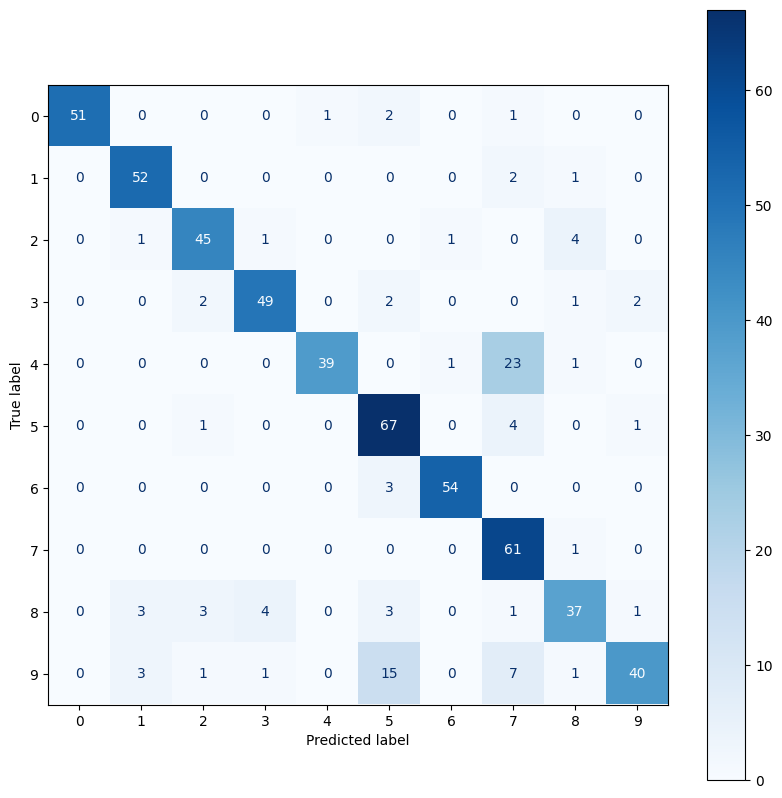

In [16]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix_display.plot(ax = ax, cmap = 'Blues')

In [17]:
class_report = metrics.classification_report(y_test, yhat_test)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.88      0.95      0.91        55
           2       0.87      0.87      0.87        52
           3       0.89      0.88      0.88        56
           4       0.97      0.61      0.75        64
           5       0.73      0.92      0.81        73
           6       0.96      0.95      0.96        57
           7       0.62      0.98      0.76        62
           8       0.80      0.71      0.76        52
           9       0.91      0.59      0.71        68

    accuracy                           0.83       594
   macro avg       0.86      0.84      0.84       594
weighted avg       0.86      0.83      0.83       594



This is significantly worse than the LDA version

# 4. Comparing to Logistic Regression

Clearly LDA and QDA are comparable because they're the same model with more or less restrictions on the estimation

What about Logistic Regression?
- Logistic Regression comes about from an entirely different perspective (its all statistical learning however)
- But the end results are still classifications
- Fair to compare performance between completely different models

In [18]:
cancer = datasets.load_breast_cancer(as_frame=True)
x, y = cancer.data, cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

lda = LDA()
lda.fit(x_train, y_train)
yhat_lda = lda.predict(x_test)

lm = LogisticRegression()
lm.fit(x_train, y_train)
yhat_lm = lm.predict(x_test)

### LDA results

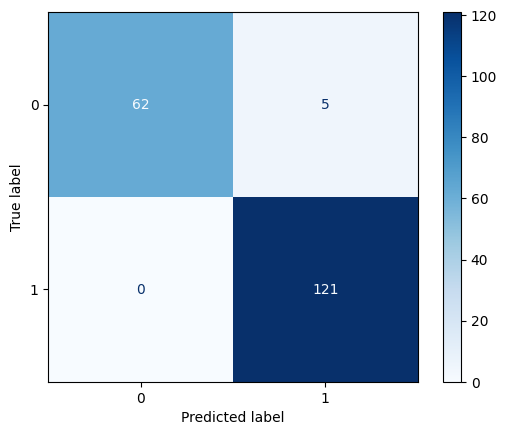

In [19]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_lda)
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'Blues')

In [20]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_lda)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(sensitivity, specificity, f1)

1.0 0.9253731343283582 0.979757085020243


### Logistic Regression results

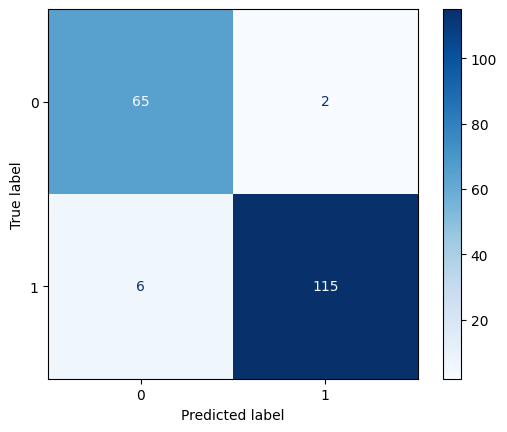

In [21]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_lm)
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'Blues')

In [22]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_lm)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(sensitivity, specificity, f1)

0.9504132231404959 0.9701492537313433 0.9663865546218487


In [23]:
# 1.0 0.9253731343283582 0.979757085020243

How should we choose which model is better?

- LDA had higher sensitivity
- Logistic Regression had higher specificity

We could use the $F_1$ score
 - But how credible is this metric?
 - Also it came out roughly the same for both models

# 5. Calibration and model evaluation

The goal of any classifier is to correctly estimate

$$ P(Y = k \mid X = x)$$

- That is, we estimate the probability of being in class $k \in 1,...,K$ given the features $X = x$

- This probability is used to make decisions, i.e. make classifications

- Why? Conditional probabilities are a well defined target for a model. Class label prediction is subject to a decision rule.

- Conditional probabilities are the more fundamental quantity of interest

Importantly -- If the estimated class probabilities are equal to the true class probabilities then we can directly use them to estimate the confidence (uncertainty) of our model's predictions




### Calibration

Calibration curve - this plot gives us an idea of the accuracy of the estimated probabilities

How it works:
1. Bin the predicted probabilities into (in this case) 10 bins
2. Calculate the average predicted probability in each bin (x-axis)
3. Calculate the average number of observations in each bin that are positive (y-axis)

Ideally, the fraction of observations in each bin is exactly equal to the average predicted probability

Why? In a calibrated model

- For the people we give a 10\% chance of having diabetes, we expect about 10\% of them to have diabetes

- For the people we give a 50\% chance of having diabetes, we expect about 50\% of them to have diabetes

- For the people we give a 90\% chance of having diabetes, we expect about 90\% of them to have diabetes

- And so on for all probabilities


If the model is calibrated (the above numbers match) then when our model says something is x% likely to happen then its acually x% likely to happen

if the model is not calibrated it can often be corrected, but we won't cover that here

https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV


In [24]:
from sklearn.calibration import calibration_curve

diabetes = pd.read_csv('diabetes.csv')
x = diabetes.drop('Outcome', axis = 1)
y = diabetes.loc[:,['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)

lm = LogisticRegression()
lm.fit(x_train, y_train)

p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)
p_hat_lm = lm.predict_proba(x_test)

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
true_lda, pred_lda = calibration_curve(y_test, p_hat_lda[:,1], n_bins=10, strategy='quantile')
true_qda, pred_qda = calibration_curve(y_test, p_hat_qda[:,1], n_bins=10, strategy='quantile')
true_lm, pred_lm = calibration_curve(y_test, p_hat_lm[:,1], n_bins=10, strategy='quantile')

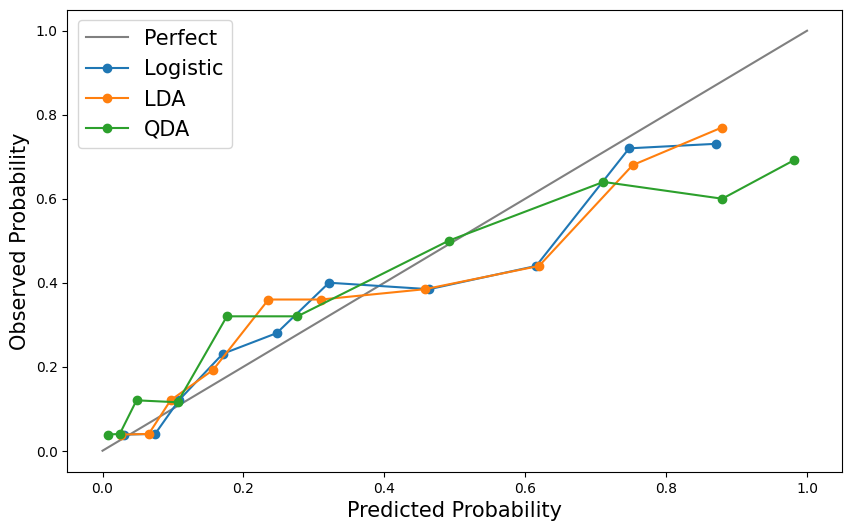

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot([1,0], [1,0], color = 'grey', label = 'Perfect')
plt.plot(pred_lm, true_lm, marker='o', label = 'Logistic')
plt.plot(pred_lda, true_lda, marker='o', label = 'LDA')
plt.plot(pred_qda, true_qda, marker='o', label = 'QDA')
plt.xlabel('Predicted Probability', fontsize = 15)
plt.ylabel('Observed Probability', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Evaluating models

Calibration plots are a qualitative way to assess the performance of a classifier, but they are not quantitative summary measures

In fact, because we used binning we do not dare calculate summary statistics of these curves (they can be manipulated by changing the bins). So we shouldn't try to "make them quantitative".

#### Score functions

__Score__ functions are statistics to evaluate model performance
 - precision, recall, accuracy, $F_1$ are all score functions


We're primarily interested in our models calibration. If your model is perfectly calibrated then your model's estimated probabilities are exactly the true class probabilities. This is the best you can ever hope for.

Goal - Score functions that are minimized (0) when the model is perfectly calibrated

Four types of scoring functions
  1. Strictly proper
  2. Proper
  3. Semi-proper
  4. Improper

1. A __strictly proper__ means that the best score (0) can __only__ be attained when the predicted probabilities are exactly the true probabilities.
 - A strictly proper scoring rule will be 0 if and only if our estimates are exactly the truth
 - As our model gets better (closer to correct) its score will decrease to 0
 - I.e. Only a perfectly calibrated model can have a score of 0

2. A __proper__ scoring rule means the correct model will have the best score (0), but other (incorrect) models can also have the best score (0).
 - The incorrect models can't improve (on average) over the correct model however.
 - I.e. A perfectly calibrated model can have a score of 0, but non-calibrated models can also have a score of 0.

3. A __semi-proper__ scoring rule does not gaurantee that the best performance is even attained by the correct classifier
 - Incorrect models can have lower scores than the correct model
 - Correct model will still likely have a low score
 - Semi-proper scoring rules can still be useful for diagnosing model performance (under certain conditions they can become proper)
 - A perfectly calibrated model will not necessarily have a score of 0, non-calibrated models can have a score of 0. Hopefully calibrated models are close to 0 however.

4. An __improper__ scoring rule has no guarantee that the best performance is attained by the correct classifier and there is no way to make it proper
  - E.x. accuracy
  - There is little to no connection between our task (probability estimation) and these scores
  - Perfectly calibrated models will not necessarily have a score even close to 0

https://stats.stackexchange.com/questions/339919/what-does-it-mean-that-auc-is-a-semi-proper-scoring-rule

https://sites.stat.washington.edu/raftery/Research/PDF/Gneiting2007jasa.pdf

### Strictly proper scoring rules

We introduce two strictly proper scoring rules for evaluating model performance. Because these are the most "precise" type of scoring rule (performance evaluation) they should be preferred as a first inspection of the model.

#### 1. Brier Score

  $$ S(p_1,...,p_k) = \frac{1}{n}\sum_{i = 1}^n \sum_{k = 1}^K (p_{k,i} - y_{k, i})^2 $$

  where $p_{k,i} = P(Y = k \mid X = x_i)$ is the estimated probability of observation $i$ being in class $k$ and $y_{k, i}$ is 1 if $Y$ is in class $k$ and $0$ if $Y$ is not in class $k$

What is Brier score doing?

Lets look at an example.

We have the labels of 5 observations given below

In [ ]:
targets = pd.DataFrame([0, 1, 1, 0, 1], columns = ['Y'])
targets

,Y
0,0
1,1
2,1
3,0
4,1


And we used some model to estimate the class probabilities

In [ ]:
probs = pd.DataFrame({'prob(y = 0)':[0.95, 0.2, 0.4, 0.8, 0.05],
                     'prob(y = 1)':[0.05, 0.8, 0.6, 0.2, 0.95]})
probs

,prob(y = 0),prob(y = 1)
0,0.95,0.05
1,0.20,0.80
2,0.40,0.60
3,0.80,0.20
4,0.05,0.95


To get Brier score we first encode the targets using a one hot encoding scheme so that we have two columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
targets = pd.DataFrame(enc.fit_transform(targets).toarray(), columns = ['Y = 0', 'Y = 1'])
targets

,Y = 0,Y = 1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


Now we find the squared pointwise distance between the two matrices

In [ ]:
squared_error = (np.array(targets) - np.array(probs))**2
squared_error

array([[0.0025, 0.0025],
       [0.04  , 0.04  ],
       [0.16  , 0.16  ],
       [0.04  , 0.04  ],
       [0.0025, 0.0025]])

Sum rows, then average. This is the Brier score

In [ ]:
np.mean(np.sum(squared_error, axis = 1))

0.098

So what is Brier measuring? Its measuring how close the predicted class probabilities are to the true class membership indicator.

Brier will be 0 if and only if we always correctly predict the right label with 100\% confidence

Side note

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html

Sklearn computes the brier score completely wrong for multi-class classification

https://stats.stackexchange.com/questions/403544/how-to-compute-the-brier-score-for-more-than-two-classes

https://journals.ametsoc.org/view/journals/mwre/78/1/1520-0493_1950_078_0001_vofeit_2_0_co_2.xml



#### 2. Log Score

  $$ S(p_1,...,p_k) = -  \frac{1}{n} \sum_{i = 1}^n \log p_k^* $$

  where $p_k^*$ is the predicted probability of the true class label


What is log score doing?

Lets look at an example.

We have the labels of 5 observations given below

In [ ]:
targets = pd.DataFrame([0, 1, 1, 0, 1], columns = ['Y'])
targets

,Y
0,0
1,1
2,1
3,0
4,1


And we used some model to estimate the class probabilities

In [ ]:
probs = pd.DataFrame({'prob(y = 0)':[0.95, 0.2, 0.4, 0.8, 0.05],
                     'prob(y = 1)':[0.05, 0.8, 0.6, 0.2, 0.95]})
probs

,prob(y = 0),prob(y = 1)
0,0.95,0.05
1,0.20,0.80
2,0.40,0.60
3,0.80,0.20
4,0.05,0.95


Log score can be shortcut to not involve one hot encoding, however we will do it anways

In [ ]:
enc = OneHotEncoder()
targets = pd.DataFrame(enc.fit_transform(targets).toarray(), columns = ['Y = 0', 'Y = 1'])
targets

,Y = 0,Y = 1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


Now we find the squared pointwise distance between the two matrices

In [ ]:
product_error = np.array(targets) * -np.log(np.array(probs))
product_error

array([[0.05129329, 0.        ],
       [0.        , 0.22314355],
       [0.        , 0.51082562],
       [0.22314355, 0.        ],
       [0.        , 0.05129329]])

Average the scores to get the log score

In [ ]:
np.mean(product_error)

0.10596993151695114

### Why are there different scores?

Brier and log score are both strictly proper scoring metrics meaning they are assessing whether your model is close to the correct model

But they come about from different considerations

For example:
- Denote the true probability $p = P(Y = 1 \mid X = x)$
- Denote the pred probability $q = \hat P(Y = 1 \mid X = x)$

Brier
- Estimates the squared distance (q - p)^2
- Low brier scores mean they are close in a very literal sense

Log
- More complex interpretation related to entropy
- Essentially log score is measuring how "surprising" the data are if we assumed they were generated according to $q$
- Or another way - how "likely" do the data seem if we suppose $q = p$?


These two do not have to agree with each other
 - Model A could have the lowest Brier and highest log
 - Model B could have the highest brier and lowest log

### Diabetes example

In this example we return to the diabetes dataset and classify patients as diabetic or not using three different algorithms (LDA, QDA, Logistic Regression).

We will measure their relative performance by Brier and Log score

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
x = diabetes.drop('Outcome', axis = 1)
y = diabetes.loc[:,['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)

lm = LogisticRegression()
lm.fit(x_train, y_train)

p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)
p_hat_lm = lm.predict_proba(x_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

In [ ]:
print('Brier score')
print('')

print('LDA:', np.round(brier_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(brier_score(y_test, p_hat_qda), 3))
print('LR:', np.round(brier_score(y_test, p_hat_lm), 3))

Brier score

LDA: 0.3
QDA: 0.342
LR: 0.3


In [ ]:
def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

In [ ]:
print('Log score')
print('')

print('LDA:', np.round(log_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(log_score(y_test, p_hat_qda), 3))
print('LR:', np.round(log_score(y_test, p_hat_lm), 3))

Log score

LDA: 0.46
QDA: 0.587
LR: 0.462


Note: While all strictly proper scoring rules are minimized by the true model, they don't have to agree with each other for incorrect models

Log score and Brier score can tell you different models are the "best"

This is when we start inspecting sensitivity and specificity again (or precision and recall)

### ROC and AUC

Strictly proper scoring rules are great because they precisely tell us how calibrated / correct our learned model is

But __semi-proper__ scoring rules and other diagnostics can still be useful because they give us a different perspective on model performance
 - Brier and Log score didnt directly tell us anything about sensitivity and specificity

Reciever Operating Characteristic curve (ROC curve)
- Plot of the false positive rate against the true positive rate as the __decision threshold__ is varied
- Shows how your model performs at all possible decision thresholds

The area under the ROC curve is called the AUC (area under curve)
 - AUC is a semi-proper scoring rule


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
x = diabetes.drop('Outcome', axis = 1)
y = diabetes.loc[:,['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)

lm = LogisticRegression()
lm.fit(x_train, y_train)

p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)
p_hat_lm = lm.predict_proba(x_test)

In [ ]:
fpr_lda, tpr_lda, thresholds = roc_curve(y_test, p_hat_lda[:,1])
fpr_qda, tpr_qda, thresholds = roc_curve(y_test, p_hat_qda[:,1])
fpr_lm, tpr_lm, thresholds = roc_curve(y_test, p_hat_lm[:,1])

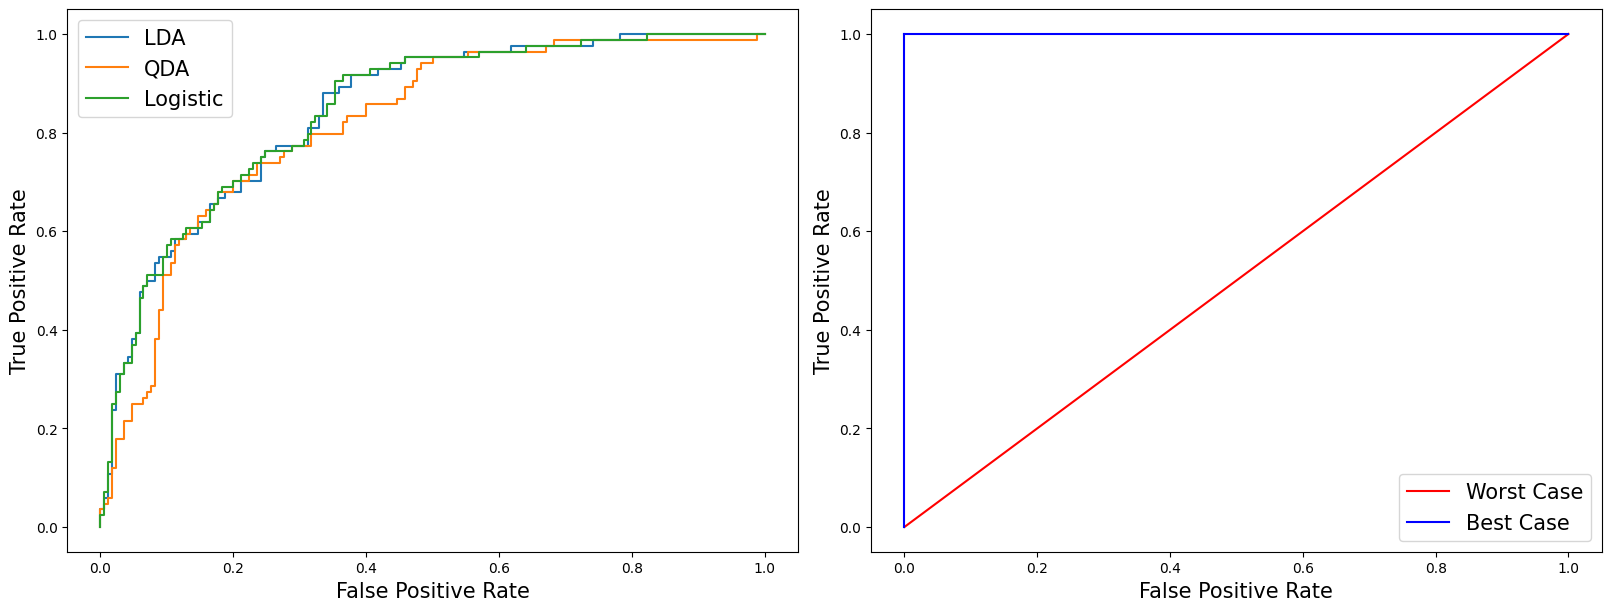

In [ ]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (16, 6))

ax[0].plot(fpr_lda, tpr_lda, label = 'LDA')
ax[0].plot(fpr_qda, tpr_qda, label = 'QDA')
ax[0].plot(fpr_lm, tpr_lm, label = 'Logistic')
ax[0].set_xlabel('False Positive Rate', fontsize = 15)
ax[0].set_ylabel('True Positive Rate', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot([0, 1], [0, 1], color = 'Red', label = 'Worst Case')
ax[1].plot([0, 0], [1, 0], color = 'Blue', label = 'Best Case')
ax[1].plot([1, 0], [1, 1], color = 'Blue')
ax[1].set_xlabel('False Positive Rate', fontsize = 15)
ax[1].set_ylabel('True Positive Rate', fontsize = 15)
ax[1].legend(fontsize = 15)
plt.show()

What this plot is showing:

In each model (LDA, QDA, Logistic) we estimate the class probabilities $P(Y = 1 \mid X = x)$ and dichotimize these into predicted labels as

$$
\hat Y = \begin{cases}
      1 & \text{if} \quad P(Y = 1 \mid X = x) \geq 0.5  \\
      0 & \text{if} \quad P(Y = 1 \mid X = x) < 0.5
   \end{cases}
$$

- The point $0.5$ in each model is called the decision threshold since this is the value we use to threshold the probabilities to decide if the label should be 1 or 0

- Everything we have done so far (sensitivity, specificity, recall, F1) that used predicted labels assumed a $0.5$ threshold by default

- But this threshold is (in some sense) completely arbitrary, particularly if the model is uncalibrated. In fact we can vary this threshold to be anything we want.

- Setting it higher will decrease the number of predicted $1$s

- Setting it lower will increase the number of predicted $1$s

- Hence sensitivty and specificity are not for a model per se, but for a decision rule applied to a model.

- If we vary the decision rule from, say 0 to 1, then we will get different values of sensitivity and specificity

- Thats what this plot shows
 - False positive rate = 1 - specificity
 - True positive rate = sensitivity

ROC curves give a comprehensive picture of your models sensitivty and specificity and show the stability of your model with respect to the decision threshold
 - More stable algorithms tend to generalize better


In [ ]:
print('Area under the curve (AUC)')
print('')
print('LDA:', np.round(roc_auc_score(y_test, p_hat_lda[:,1]), 3))
print('QDA:', np.round(roc_auc_score(y_test, p_hat_qda[:,1]), 3))
print('LR:', np.round(roc_auc_score(y_test, p_hat_lm[:,1]), 3))

Area under the curve (AUC)

LDA: 0.843
QDA: 0.817
LR: 0.844


- AUC tells us how "elbowy" the ROC curve is. Larger numbers (close to 1) are better.

- so technically 1 - AUC is the scoring rule, but no one presents it that way

- remember: Good models will have a high AUC but the model with the highest AUC is not necessarily the best

### Cancer example

In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer(as_frame=True)
x, y = cancer.data, cancer.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)

lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [ ]:
p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)
p_hat_lm = lm.predict_proba(x_test)

In [ ]:
print('Brier score')
print('')

print('LDA:', np.round(brier_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(brier_score(y_test, p_hat_qda), 3))
print('LR:', np.round(brier_score(y_test, p_hat_lm), 3))

Brier score

LDA: 0.055
QDA: 0.084
LR: 0.056


In [ ]:
print('Log score')
print('')

print('LDA:', np.round(log_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(log_score(y_test, p_hat_qda), 3))
print('LR:', np.round(log_score(y_test, p_hat_lm), 3))

Log score

LDA: 0.097
QDA: 0.83
LR: 0.098


In [ ]:
fpr_lda, tpr_lda, thresholds = roc_curve(y_test, p_hat_lda[:,1])
fpr_qda, tpr_qda, thresholds = roc_curve(y_test, p_hat_qda[:,1])
fpr_lm, tpr_lm, thresholds = roc_curve(y_test, p_hat_lm[:,1])

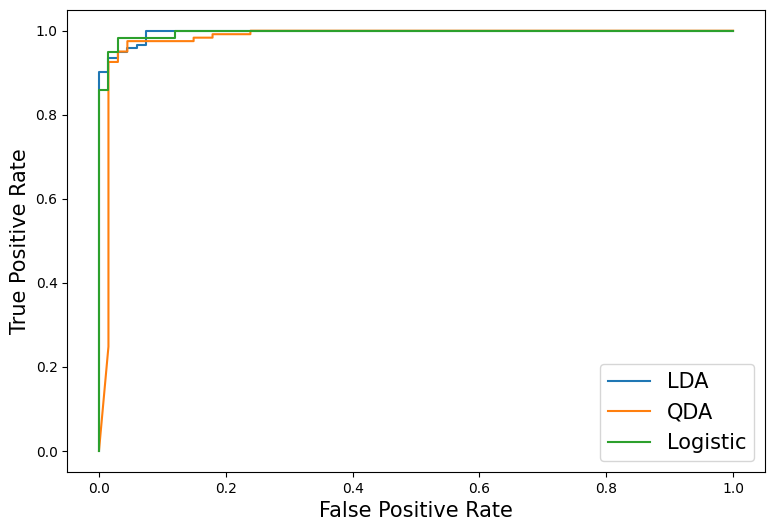

In [ ]:
plt.figure(figsize = (9, 6))

plt.plot(fpr_lda, tpr_lda, label = 'LDA')
plt.plot(fpr_qda, tpr_qda, label = 'QDA')
plt.plot(fpr_lm, tpr_lm, label = 'Logistic')

plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
print('Area under the curve (AUC)')
print('')
print('LDA:', np.round(roc_auc_score(y_test, p_hat_lda[:,1]), 3))
print('QDA:', np.round(roc_auc_score(y_test, p_hat_qda[:,1]), 3))
print('LR:', np.round(roc_auc_score(y_test, p_hat_lm[:,1]), 3))

Area under the curve (AUC)

LDA: 0.996
QDA: 0.981
LR: 0.996


- The ROC curve "agrees" with our Brier and log scores.

- Each model had very low (close to 0) scores and correspondingly very high AUC values

- Except QDA, which had a relatively high Brier / Log score and a high AUC

- Scores (proper or otherwise) do not have to be proportionate with each other

### Multiclass example - Image classification

In [ ]:
# image classification
digits = datasets.load_digits()
x, y = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)

lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [ ]:
p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)
p_hat_lm = lm.predict_proba(x_test)

In [ ]:
print('Brier score')
print('')

print('LDA:', np.round(brier_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(brier_score(y_test, p_hat_qda), 3))
print('LR:', np.round(brier_score(y_test, p_hat_lm), 3))

Brier score

LDA: 0.078
QDA: 0.35
LR: 0.055


In [ ]:
print('Log score')
print('')

print('LDA:', np.round(log_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(log_score(y_test, p_hat_qda), 3))
print('LR:', np.round(log_score(y_test, p_hat_lm), 3))

Log score

LDA: 0.199
QDA: 9.604
LR: 0.139


- ROC and AUC are really only for Binary classification
- But we convert the $k$-class problem into $k$ binary problems

In [ ]:
enc = OneHotEncoder()
target_enc = enc.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()
target_enc.shape

(594, 10)

In [ ]:
p_hat_lm.shape

(594, 10)

In [ ]:
[roc_auc_score(target_enc[:,i], p_hat_lda[:,i]) for i in range(target_enc.shape[1])]

[1.0,
 0.9974700624051274,
 0.9991839341470338,
 0.9985063728093468,
 0.9999410377358491,
 0.9993952620093076,
 0.9991832467574896,
 0.9988782439970895,
 0.9968421799602611,
 0.99622567658242]

In [ ]:
multi_auc = np.mean(np.array([roc_auc_score(target_enc[:,i], p_hat_lda[:,i]) for i in range(target_enc.shape[1])]))
multi_auc

0.9985626016403923

In [ ]:
def multi_auc(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()
  return np.mean(np.array([roc_auc_score(target_enc[:,i], probs[:,i]) for i in range(target_enc.shape[1])]))

In [ ]:
print('Multiclass AUC')
print('')

print('LDA:', np.round(multi_auc(y_test, p_hat_lda), 3))
print('QDA:', np.round(multi_auc(y_test, p_hat_qda), 3))
print('LR:', np.round(multi_auc(y_test, p_hat_lm), 3))

Multiclass AUC

LDA: 0.999
QDA: 0.966
LR: 0.999


- Multi AUC is not a well defined score and not often
- Can be misleading
 - QDA has a very high AUC, but very poor scores